In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tarfile
import seaborn as sns

from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from pandas.plotting import scatter_matrix

from six.moves import urllib

%matplotlib inline
pd.set_option('display.max_columns',21)

# Описание данных


In [2]:
melb_data = pd.read_csv('datasets/melb_data.csv')
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
print(f'Total shape {melb_data.shape}')
print(f'All columns: {", ".join(melb_data.columns.values)}')

Total shape (13580, 21)
All columns: Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount


In [4]:
melb_data.describe(include="all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,28 Blair St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


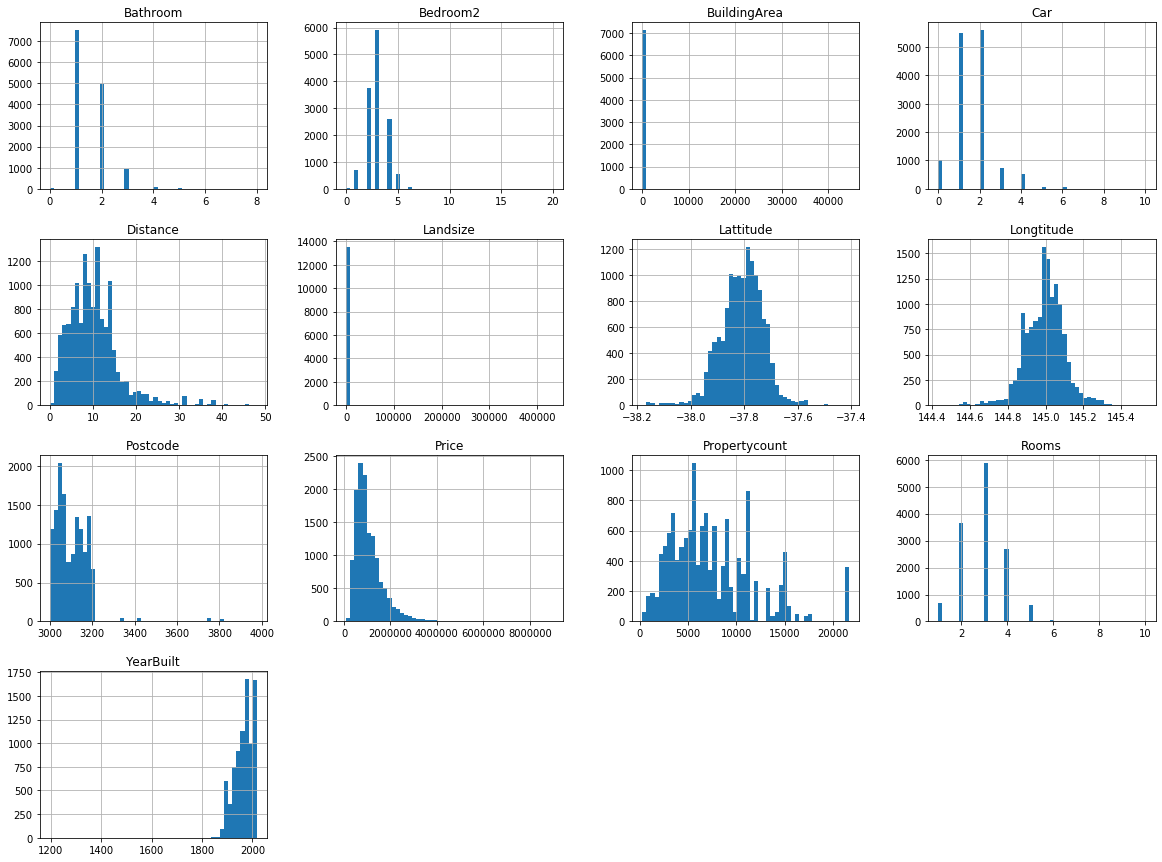

In [5]:
melb_data.hist(bins = 50,figsize=(20,15))
plt.savefig('./melb_his.png')
plt.show()

In [6]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [7]:
melb_data['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [8]:
target = 'Price'
categorial = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
numerical = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
             'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
useless = ['Date']

melb_data = melb_data.drop(useless, axis=1)
print(f'Target column: {target}')
print(f'Categorial columns: {", ".join(categorial)}')
print(f'Numerical columns: {", ".join(numerical)}')
print(f'Useless columns: {useless[0]}')

Target column: Price
Categorial columns: Suburb, Address, Type, Method, SellerG, CouncilArea, Regionname
Numerical columns: Rooms, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Lattitude, Longtitude, Propertycount
Useless columns: Date


# Работа с пропусками

In [9]:
def fillna(hotel_data, replase_dict):
    for column, value in replase_dict.items():
        hotel_data[column] = hotel_data[column].fillna(value)

In [10]:
print("Working with \'Nan\'. Next columns:")
nan_col = []

for column in melb_data.columns:
    check = melb_data[column].isnull().values.any()
    if check:
        nan_col += [column]
        print(f'{column}')
print("Columns: ", nan_col)

values_for_fill = []
# For column Car and take mean
values_for_fill.append(round(melb_data['Car'].mean()))

# For column BuildingArea take mean
values_for_fill.append(round(melb_data['BuildingArea'].mean()))

# For column Year and take mean
values_for_fill.append(round(melb_data['YearBuilt'].mean()))

# For column CouncilArea take most popular
values_for_fill.append(melb_data['CouncilArea'].mode()[0])

print("Values for replacing: ", values_for_fill)

replace_dict = dict(zip(nan_col, values_for_fill))
fillna(melb_data, replace_dict)

melb_data.head()

Working with 'Nan'. Next columns:
Car
BuildingArea
YearBuilt
CouncilArea
Columns:  ['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']
Values for replacing:  [2, 152, 1965, 'Moreland']


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,152.0,1965.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,152.0,1965.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Масштабирование

In [11]:
scalered = StandardScaler()
scalered.fit(melb_data[numerical])
melb_data[numerical] = scalered.transform(melb_data[numerical])

# Работа с категориальными признаками

Сколько всего уникальных значений в категориальных столбцах:

In [12]:
for item in categorial:
    print(len(melb_data[item].unique()), end =', ')

314, 13378, 3, 5, 268, 33, 8, 

Можно заметить, что адресов слишком много, для этого можно выделять не сам адрес, а улицу, на которой расположен дом.

In [13]:
new_address = []
for item in melb_data['Address']:
    new_address.append(item.split()[1])
    
melb_data['Address'] = new_address
len(melb_data['Address'].unique())

4117

Извавляемся от категориальных признаков, присваивая им числовые значения:

In [14]:
label_encoder = LabelEncoder()
print(categorial)
for each in categorial:
    melb_cat = melb_data[each]
    melb_cat_encoded = label_encoder.fit_transform(melb_cat)
    melb_data[each] = melb_cat_encoded

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']


In [15]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,3733,-0.981463,0,1480000.0,1,23,-1.301485,-0.422415,-0.947035,-0.772376,-0.636847,-0.089316,0.000043,0.006586,31,0.121160,0.030640,2,-0.784625
1,0,421,-0.981463,0,1035000.0,1,23,-1.301485,-0.422415,-0.947035,-0.772376,-1.677692,-0.100843,-0.186187,-2.236992,31,0.016437,-0.017478,2,-0.784625
2,0,743,0.064876,0,1465000.0,3,23,-1.301485,-0.422415,0.088284,0.673367,-1.677692,-0.106356,-0.005059,-2.236992,31,-0.001227,-0.007855,2,-0.784625
3,0,1365,0.064876,0,850000.0,0,23,-1.301485,-0.422415,0.088284,0.673367,-0.636847,-0.116380,0.000043,0.006586,31,0.155226,0.016204,2,-0.784625
4,0,2932,1.111216,0,1600000.0,4,155,-1.301485,-0.422415,0.088284,-0.772376,0.403998,-0.109864,-0.025468,1.697898,31,0.025269,-0.010742,2,-0.784625


# Зависимости от числовых значений


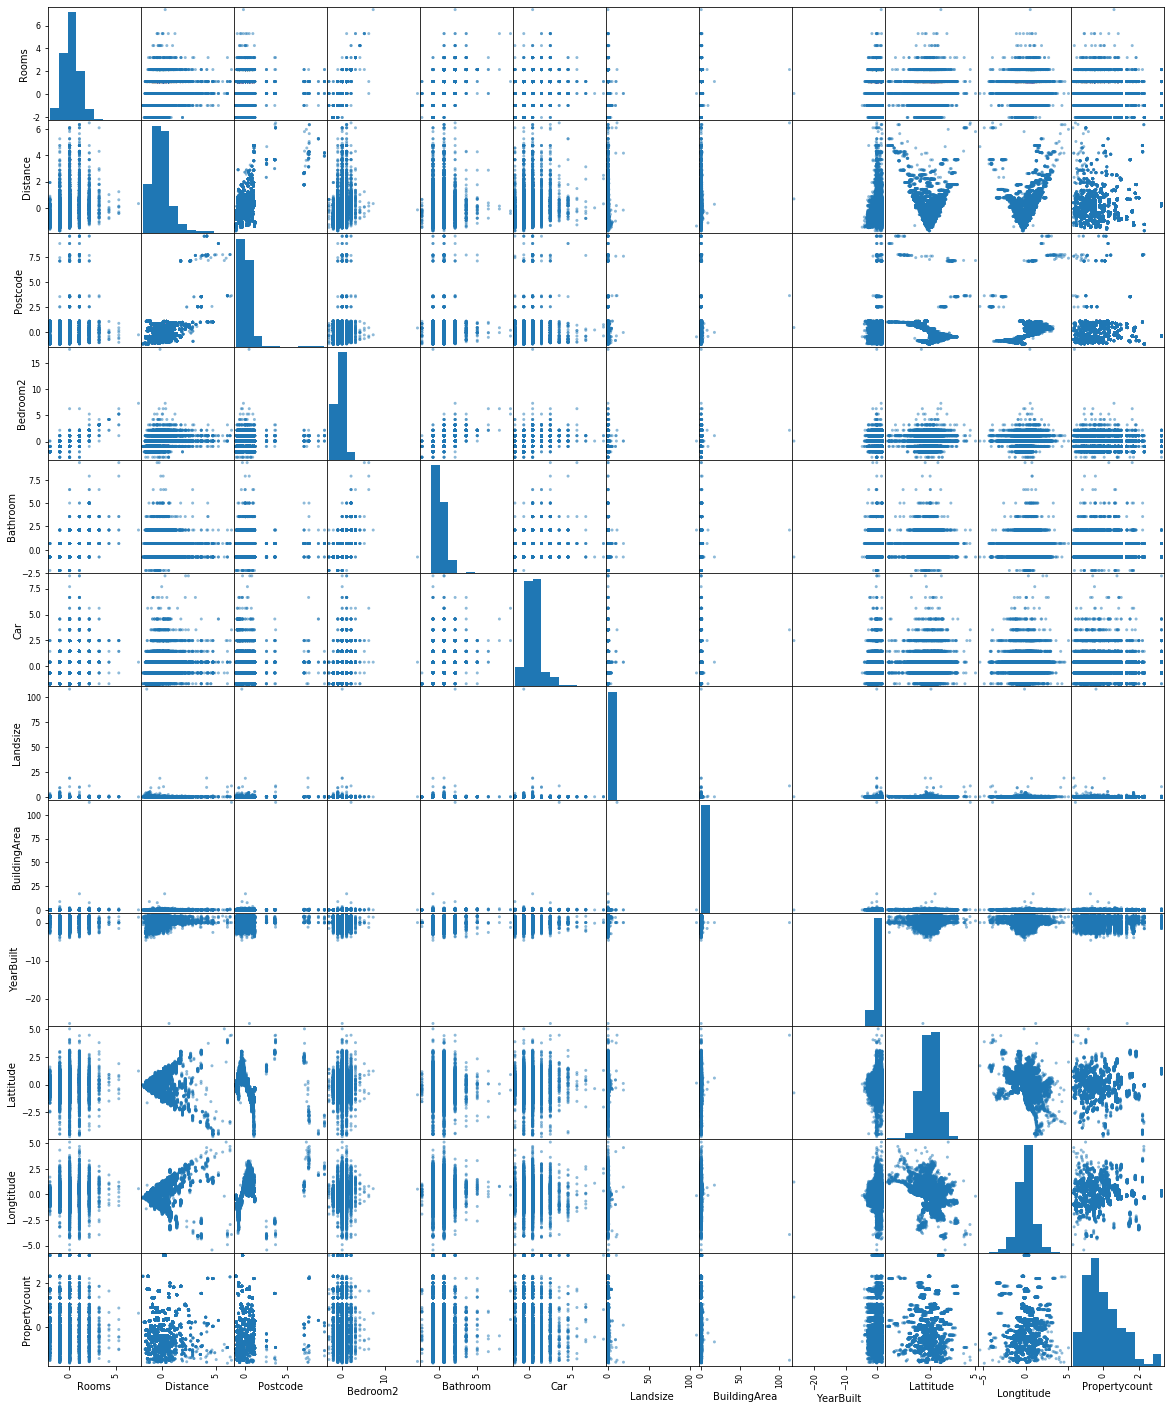

In [16]:
scatter_matrix(melb_data[numerical], figsize=(20, 25));

In [17]:
print(len(numerical))
print(numerical)

12
['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


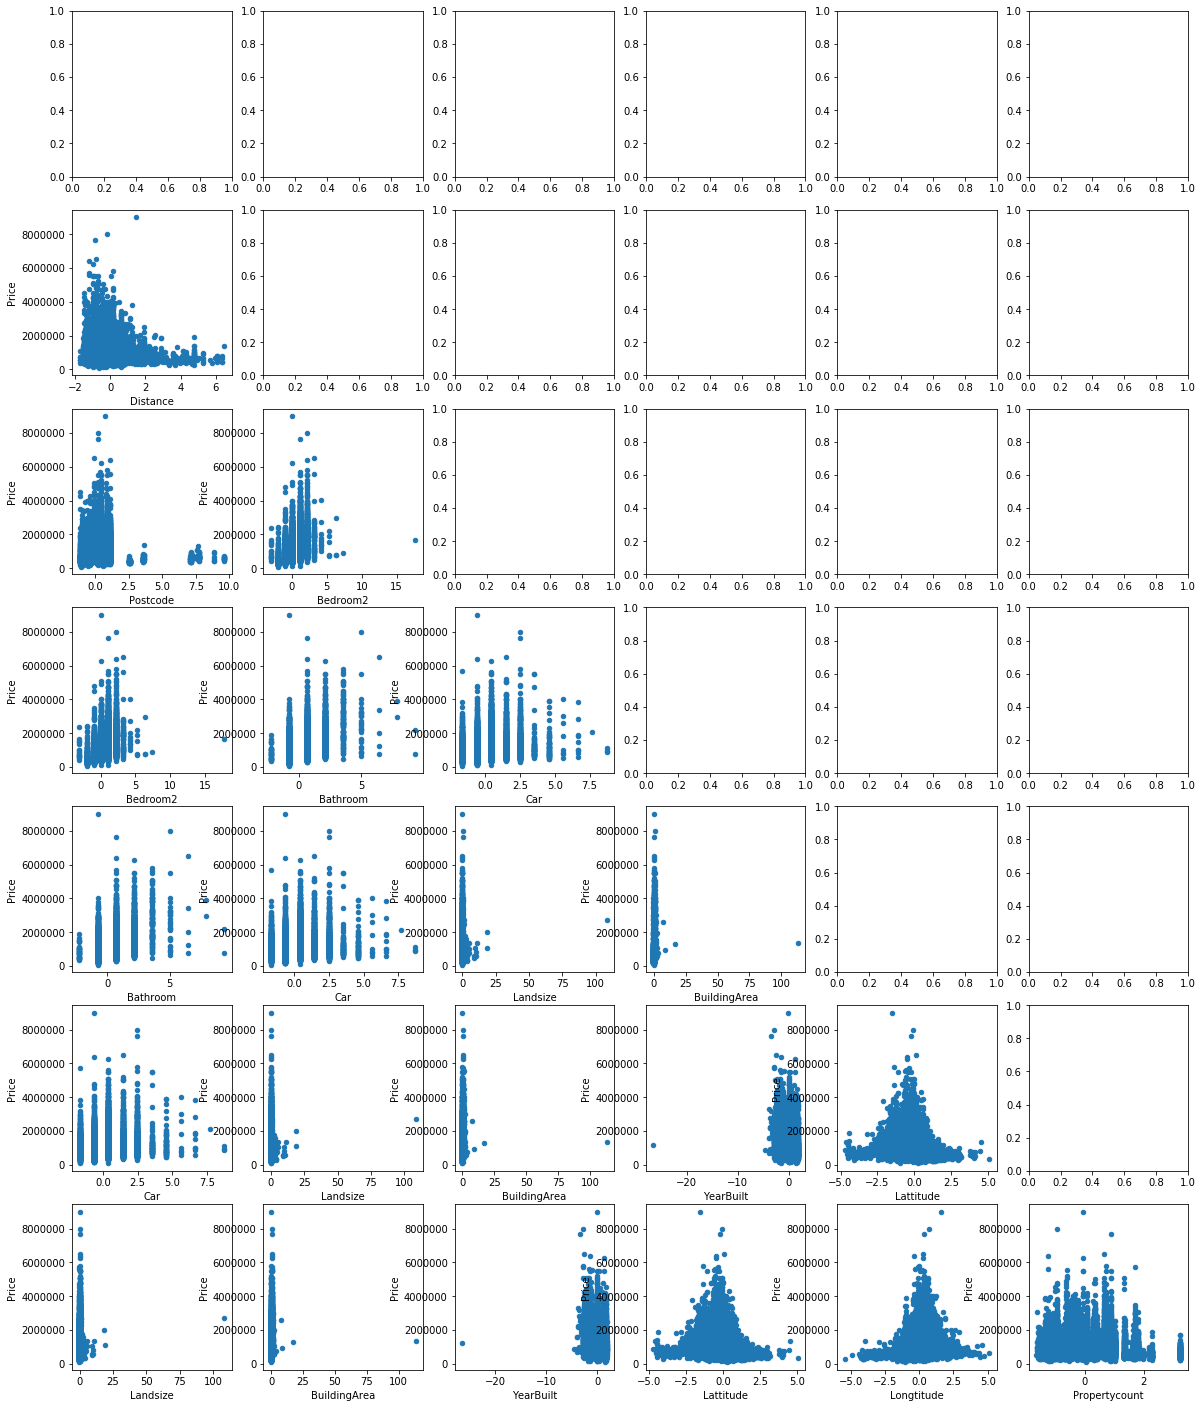

In [18]:
plot_arr =  numerical
nrows = 7
ncols = 6

fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize = (20,25))
for i in range(nrows):
    for j in range(i):
        if i > ncols:
            break
        if i+j >= len(plot_arr):
            continue
        column = plot_arr[i+j]
        melb_data.plot.scatter(x=column, y=target, ax=axs[i][j])
fig.savefig('./melb_numerical_depend.png')
plt.show()

# Работа с выбросами

In [19]:
X = melb_data.drop(labels=target, axis=1)
X = X.drop(labels=categorial, axis= 1)
db = DBSCAN(eps = 0.9, min_samples = 3)
X = melb_data.drop(labels=[target] ,axis=1)
X = X.drop(labels=categorial, axis= 1)
db.fit(X)
melb_data = melb_data.drop(np.where(db.labels_==-1)[0])

In [20]:
idx = (db.labels_== -1)
db.labels_[idx].shape

(2218,)

# Корреляция признаков

In [21]:
corr_matrix = melb_data.corr()
corr_matrix[target].sort_values(ascending=False)

Price            1.000000
Rooms            0.502859
Bedroom2         0.500455
Bathroom         0.444198
BuildingArea     0.439132
Longtitude       0.235737
Car              0.231800
Postcode         0.181830
Landsize         0.127769
Regionname       0.065294
Address          0.010767
Propertycount   -0.046648
SellerG         -0.048191
Method          -0.055305
CouncilArea     -0.081249
Distance        -0.121113
Suburb          -0.136872
Lattitude       -0.238679
YearBuilt       -0.262753
Type            -0.444114
Name: Price, dtype: float64

# Результирующее описание

In [22]:
melb_data.describe(include="all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,11362.000000,11362.000000,11362.000000,11362.000000,1.136200e+04,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000
mean,155.174617,2087.802676,-0.123542,0.574547,1.030353e+06,1.408379,130.074019,-0.079343,-0.059793,-0.107809,-0.129795,-0.109187,-0.028629,-0.027737,0.006725,15.624538,0.019734,-0.021537,3.773983,-0.008689
std,90.277164,1198.855672,0.899476,0.856244,5.766191e+05,1.112979,77.748667,0.871617,0.801591,0.887499,0.848088,0.809266,0.137668,0.120845,0.935234,9.637503,0.936240,0.922910,2.022007,0.991936
min,0.000000,0.000000,-2.027803,0.000000,8.500000e+04,0.000000,1.000000,-1.727488,-1.161329,-1.982355,-2.218118,-1.677692,-0.139936,-0.387723,-3.721204,0.000000,-4.613822,-4.357989,0.000000,-1.613691
25%,70.000000,1054.000000,-0.981463,0.000000,6.400000e+05,1.000000,73.000000,-0.688041,-0.676072,-0.947035,-0.772376,-0.636847,-0.100091,-0.086694,-0.165997,6.000000,-0.582817,-0.634155,2.000000,-0.702175
50%,154.000000,2093.000000,0.064876,0.000000,8.880000e+05,1.000000,135.000000,-0.159798,-0.256987,0.088284,-0.772376,-0.636847,-0.042204,0.000043,0.006586,18.000000,0.115229,0.035163,5.000000,-0.208161
75%,234.000000,3114.000000,0.064876,1.000000,1.295000e+06,1.000000,193.000000,0.419566,0.448841,0.088284,0.673367,0.403998,0.019191,0.000043,0.179168,23.000000,0.666223,0.571243,5.000000,0.621362
max,313.000000,4115.000000,3.203895,2.000000,9.000000e+06,4.000000,267.000000,4.747752,7.727695,3.194242,3.564851,4.567379,4.170277,1.566416,1.801447,32.000000,3.143609,3.540734,7.000000,3.242170
